<a href="https://colab.research.google.com/github/Prashasticodes/CODSOFT/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction
License(s): other
bank-customer-churn-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bank-customer-churn-prediction.zip
replace Churn_Modelling.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Churn_Modelling.csv     
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
Accuracy: 0.867
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.48      0.58       393

    accuracy                           0.87      2000
   macro avg       0.

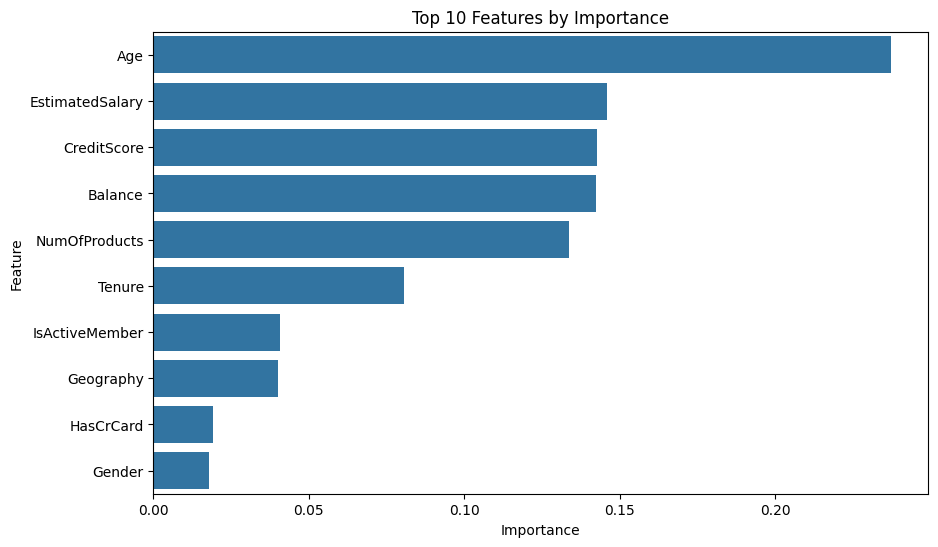

In [8]:
# Step 1: Upload your Kaggle API Key (kaggle.json)
from google.colab import files
files.upload()  # Upload kaggle.json here

# Step 2: Set up the Kaggle API key for authentication
import os
os.makedirs('/root/.kaggle', exist_ok=True)
!mv kaggle.json /root/.kaggle/

# Step 3: Install Kaggle API (if not already installed)
!pip install kaggle

# Step 4: Download the dataset using Kaggle API
!kaggle datasets download -d shantanudhakadd/bank-customer-churn-prediction

# Step 5: Unzip the downloaded dataset
!unzip bank-customer-churn-prediction.zip

# Step 6: Load the dataset into pandas
import pandas as pd

# Step 1: Load the dataset
df = pd.read_csv('Churn_Modelling.csv')

# Step 2: Check for missing values
print(df.isnull().sum())

# Step 3: Handle missing values (numeric columns can be filled with mean, non-numeric columns with mode)
# Fill missing values in numeric columns with the mean
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Fill missing values in non-numeric columns with the mode (most frequent value)
non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns
for column in non_numeric_columns:
    df[column] = df[column].fillna(df[column].mode()[0])

# Step 4: Encoding categorical variables (e.g., 'Geography' and 'Gender')
# Convert 'Geography' and 'Gender' columns to numerical using Label Encoding
df['Geography'] = df['Geography'].map({'France': 0, 'Spain': 1, 'Germany': 2})
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Step 5: Drop columns that won't be used in the model (e.g., 'RowNumber', 'CustomerId', 'Surname')
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

# Step 6: Define features (X) and target (y)
X = df.drop('Exited', axis=1)  # All columns except 'Exited'
y = df['Exited']  # The 'Exited' column is our target variable

# Step 7: Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Build a machine learning model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 9: Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_test)

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



# Display the first few rows of the dataset
df.head()

# Step 7: Preprocessing the data (Handling missing values, encoding categorical variables, etc.)
# You can adjust this step based on the dataset structure
# For example, let's check for missing values
print(df.isnull().sum())

# If there are any missing values, we can handle them (you can choose your preferred method)
# Example: Filling missing values with the mean
df.fillna(df.mean(), inplace=True)

# Step 8: Define features (X) and target (y)
X = df.drop('Exited', axis=1)  # Features (drop target variable 'Exited')
y = df['Exited']  # Target variable (churn, 'Exited' column)

# Step 9: Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 10: Initialize and train the model (Random Forest classifier)
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 11: Make predictions and evaluate the model
y_pred = rf_model.predict(X_test)

# Step 12: Evaluate the model using classification report and AUC-ROC score
from sklearn.metrics import classification_report, roc_auc_score

print("Classification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
print(f"AUC-ROC: {roc_auc:.2f}")

# Step 13: Feature importance (Random Forests provide feature importance)
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importances
feature_importances = rf_model.feature_importances_
features = X.columns

# Create a DataFrame to sort and visualize feature importance
feature_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df.head(10))
plt.title('Top 10 Features by Importance')
plt.show()


In [7]:
import pandas as pd

# Step 1: Load the dataset
df = pd.read_csv('Churn_Modelling.csv')

# Step 2: Check for missing values
print(df.isnull().sum())

# Step 3: Handle missing values (numeric columns can be filled with mean, non-numeric columns with mode)
# Fill missing values in numeric columns with the mean
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Fill missing values in non-numeric columns with the mode (most frequent value)
non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns
for column in non_numeric_columns:
    df[column] = df[column].fillna(df[column].mode()[0])

# Step 4: Encoding categorical variables (e.g., 'Geography' and 'Gender')
# Convert 'Geography' and 'Gender' columns to numerical using Label Encoding
df['Geography'] = df['Geography'].map({'France': 0, 'Spain': 1, 'Germany': 2})
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Step 5: Drop columns that won't be used in the model (e.g., 'RowNumber', 'CustomerId', 'Surname')
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

# Step 6: Define features (X) and target (y)
X = df.drop('Exited', axis=1)  # All columns except 'Exited'
y = df['Exited']  # The 'Exited' column is our target variable

# Step 7: Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Build a machine learning model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 9: Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_test)

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
Accuracy: 0.867
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.48      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [9]:
from sklearn.metrics import accuracy_score

# Assuming y_test are true labels and y_pred are predicted labels
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 86.70%
